# Analysis part - Blastoise___Holo_1999_Base_Set

In [20]:
library(ggplot2)
library(quantreg)


df = read.csv('lagged_merged_datasets_final/merged_Blastoise___Holo_1999_Base_Set.csv')

#convert prices to returns
grades <- grep("grade[0-9]+price", names(df), value = TRUE)
grade_returns <- sapply(grades, function(x) paste0(x, "_return"))

for(grade in grades) {
  df[paste(grade, "return", sep = "_")] <- c(NA, diff(log(df[[grade]])))
}

# Convert adjclosestock and adjclosebond (including their lags) to returns
stock_bond_cols <- grep("adjclose(stock|bond)(lag[0-9]+)?", names(df), value = TRUE)

for(col in stock_bond_cols) {
  df[paste0(col, "_return")] <- c(NA, diff(log(df[[col]])))
}

# Remove rows with NA in the newly created return columns
df <- na.omit(df)

head(df)


,date,grade5price,grade6price,grade7price,grade8price,grade9price,grade10price,adjclosestock,volume,adjclosebond,...,adjclosestocklag2_return,adjclosebondlag2_return,adjclosestocklag3_return,adjclosebondlag3_return,adjclosestocklag4_return,adjclosebondlag4_return,adjclosestocklag5_return,adjclosebondlag5_return,adjclosestocklag6_return,adjclosebondlag6_return
2,2016-10-01,10,18.25,25.0,48.95125,76.0000,222.5,2126.15,72915530000,2.589,...,-0.001219987,0.022208040,0.034990433,-0.05570609,0.0009105066,-0.13065558,0.0152083668,-0.01397565,0.0026957615,0.01740491
3,2016-11-01,10,18.25,25.0,29.51750,76.0000,222.5,2198.81,88445380000,3.017,...,-0.001235214,0.045990159,-0.001219987,0.02220804,0.0349904327,-0.05570609,0.0009105066,-0.13065558,0.0152083668,-0.01397565
4,2016-12-01,10,24.99,25.0,26.72000,39.6200,222.5,2238.83,75344550000,3.063,...,-0.019616837,0.102831645,-0.001235214,0.04599016,-0.0012199868,0.02220804,0.0349904327,-0.05570609,0.0009105066,-0.13065558
5,2017-01-01,10,24.99,20.5,31.00000,78.4175,192.5,2278.87,70576420000,3.051,...,0.033603545,0.152991251,-0.019616837,0.10283165,-0.0012352137,0.04599016,-0.0012199868,0.02220804,0.0349904327,-0.05570609
6,2017-02-01,10,24.99,20.5,23.25000,55.9920,151.0,2363.64,69260940000,2.968,...,0.018037111,0.015131869,0.033603545,0.15299125,-0.0196168370,0.10283165,-0.0012352137,0.04599016,-0.0012199868,0.02220804
7,2017-03-01,10,24.99,20.5,24.50000,76.5120,151.0,2362.72,81664010000,3.018,...,0.017726315,-0.003925372,0.018037111,0.01513187,0.0336035450,0.15299125,-0.0196168370,0.10283165,-0.0012352137,0.04599016


                         grade5price_return grade6price_return
grade5price_return              1.000000000        0.323184576
grade6price_return              0.323184576        1.000000000
grade7price_return              0.359460227        0.332780500
grade8price_return              0.139434340        0.073062694
grade9price_return              0.324402608       -0.014209261
grade10price_return             0.323062331        0.176325554
adjclosestock_return           -0.103897384       -0.041649136
adjclosebond_return             0.134898223        0.043957486
adjclosestocklag1_return       -0.064438272        0.150667913
adjclosebondlag1_return        -0.008550571        0.028571345
adjclosestocklag2_return        0.120982630        0.106178462
adjclosebondlag2_return         0.024484364        0.146357139
adjclosestocklag3_return        0.088561160        0.086422365
adjclosebondlag3_return        -0.345088175       -0.234190366
adjclosestocklag4_return       -0.184383117       -0.26

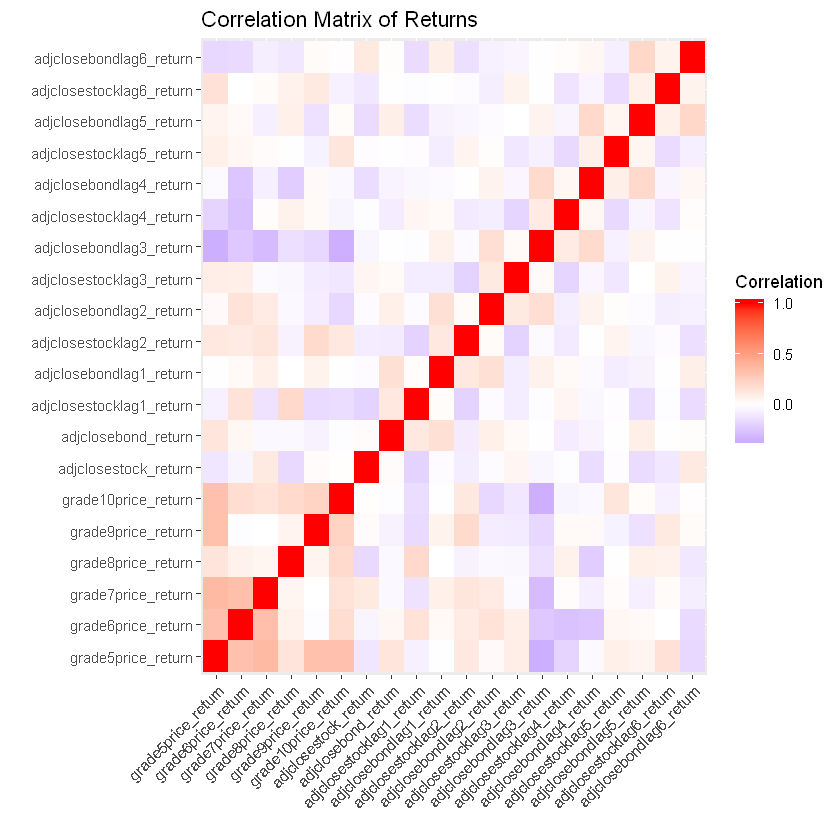

In [23]:
createReturnsCorrelationMatrix <- function(df) {
  # Load necessary libraries
  library(ggplot2)
  library(reshape2)
  
  # Select columns that contain the word 'return' to focus on returns of grades, stocks, and bonds
  return_columns <- grep("_return", names(df), value = TRUE)
  
  # Calculate the correlation matrix for selected columns
  correlation_matrix <- cor(df[, return_columns], use = "complete.obs")
  
  # Print the correlation matrix to the console
  print(correlation_matrix)
  
  # Melt the correlation matrix for visualization
  melted_correlation_matrix <- melt(correlation_matrix)
  
  # Create the ggplot object for the correlation matrix
  plot <- ggplot(data = melted_correlation_matrix, aes(x=Var1, y=Var2, fill=value)) +
    geom_tile() +
    scale_fill_gradient2(midpoint=0, low="blue", high="red", mid="white") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x='', y='', title='Correlation Matrix of Returns', fill='Correlation')
  
  # Explicitly print the ggplot object to ensure it's displayed
  print(plot)
  
  # Return the correlation matrix as well
  return(correlation_matrix)
}

# Assuming your adjusted dataset is in 'df'
# Example usage:
correlation_matrix <- createReturnsCorrelationMatrix(df)


## VAR model - try later

In [38]:
#install.packages('vars', type = 'binary')
library(vars)

# Assuming 'data_var_subset' is a dataframe with the relevant variables for VAR model
data_var_subset <- df[c("grade10price", "adjclosestock")]

# Determine optimal number of lags
var1.select <- VARselect(data_var_subset, lag.max=6, type="const")
var1.select$selection

# Once you have the optimal number of lags, you can fit the VAR model
#optimal_lags <- var1.select$selection["AIC"]  # Choosing based on AIC, for example
#var_model <- VAR(data_var_subset, p=optimal_lags, type="const")

# Now, 'var_model' contains your fitted VAR model with the optimal lag length


AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

## Visualisation

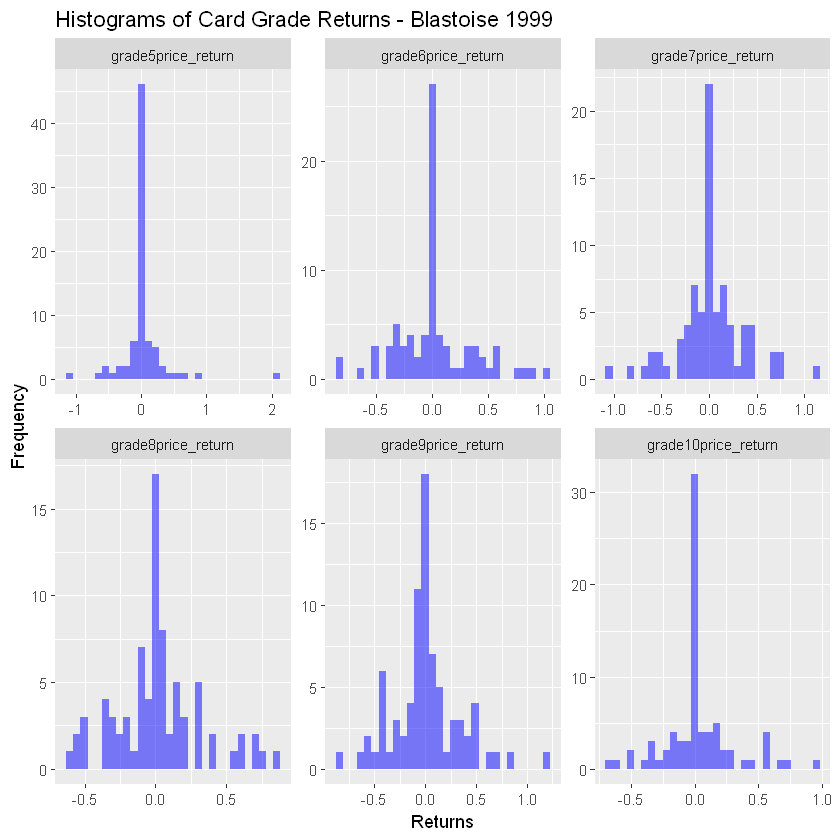

In [39]:

#create a long format data frame suitable for faceting with returns
long_df <- reshape2::melt(df, id.vars = "date", measure.vars = grade_returns)

#histograms for card grade returns
p1 <- ggplot(long_df, aes(x = value)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.5) +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Returns", y = "Frequency", title = "Histograms of Card Grade Returns - Blastoise 1999")

print(p1)

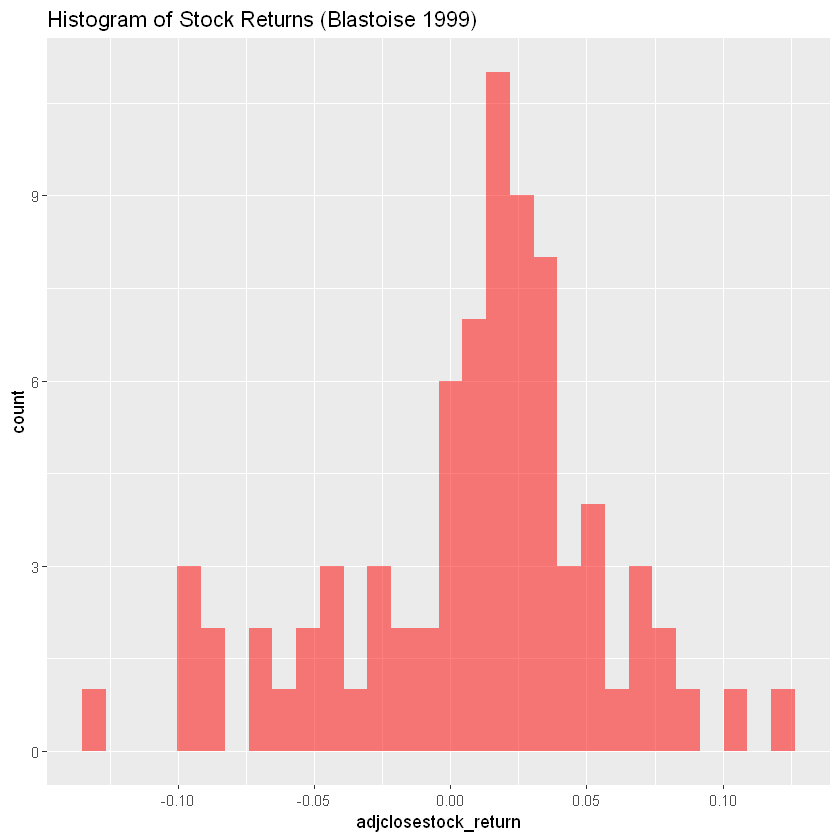

In [40]:
#histogram of stock returns
p2 <- ggplot(df, aes(x = adjclosestock_return)) +
  geom_histogram(bins = 30, fill = "red", alpha = 0.5) +
  labs(title = "Histogram of Stock Returns (Blastoise 1999)")

print(p2)

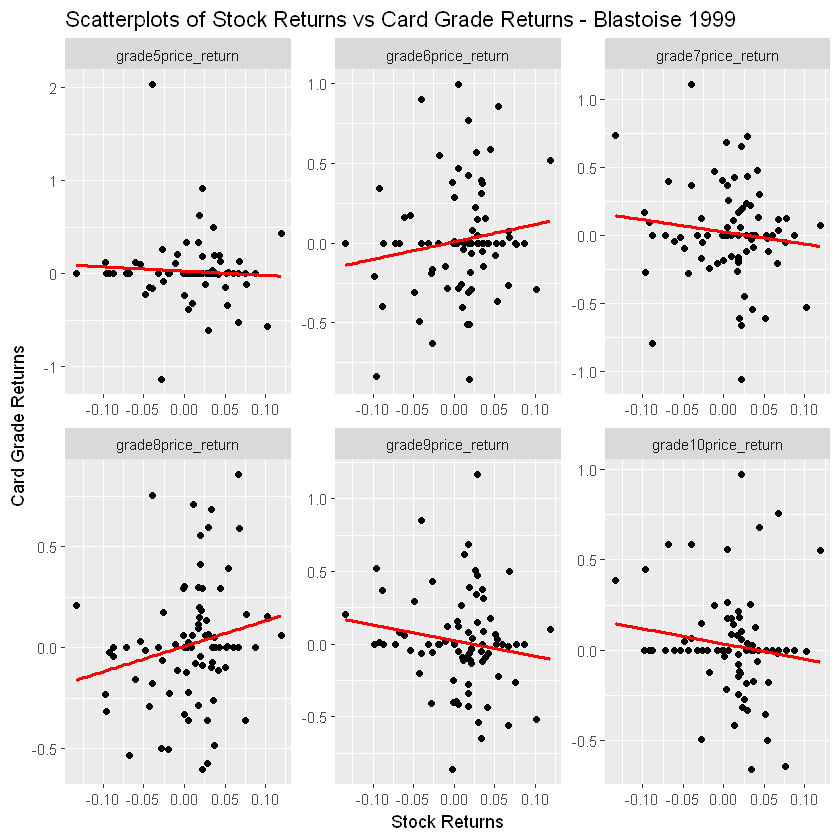

In [43]:
#a long format data frame suitable for scatterplots with returns
long_df <- reshape2::melt(df, id.vars = c("date", "adjclosestocklag1_return"), measure.vars = grade_returns) #ADJUST FOR DIFFERENT LAGS

#scatterplots between stock returns and card grades returns
p3 <- ggplot(long_df, aes(x = adjclosestocklag1_return, y = value)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Stock Returns", y = "Card Grade Returns", title = "Scatterplots of Stock Returns vs Card Grade Returns - Blastoise 1999")

print(p3)

## Models

### OLS

In [44]:
#OLS
ols_models <- list()
for(grade_return in grade_returns) {
  ols_models[[grade_return]] <- lm(get(grade_return) ~ adjclosestocklag1_return, data = df)  #ADJUST FOR DIFFERENT LAGS
}

#print summary of each OLS model
for(grade_return in grade_returns) {
  print(paste("Summary of model for:", grade_return))
  print(summary(ols_models[[grade_return]]))
}


[1] "Summary of model for: grade5price_return"

Call:
lm(formula = get(grade_return) ~ adjclosestocklag1_return, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17932 -0.06279 -0.01806  0.01289  1.98774 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)               0.02630    0.03924   0.670    0.505
adjclosestocklag1_return -0.45727    0.80701  -0.567    0.573

Residual standard error: 0.3439 on 77 degrees of freedom
Multiple R-squared:  0.004152,	Adjusted R-squared:  -0.008781 
F-statistic: 0.3211 on 1 and 77 DF,  p-value: 0.5726

[1] "Summary of model for: grade6price_return"

Call:
lm(formula = get(grade_return) ~ adjclosestocklag1_return, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88359 -0.15540 -0.03101  0.12519  0.98202 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)               0.00706    0.03969   0.178    0.859
adjclosestocklag1_return  1.0

### Quantile regression

In [16]:
#Quantile regression
library(quantreg)

quantile_models <- list()
for(grade_return in grade_returns) {
  quantile_models[[grade_return]] <- rq(get(grade_return) ~ adjclosestock_return, data = df, tau = 0.1)  #change tau for different quantiles
}                                                                                                        #ADJUST FOR DIFFERENT LAGS 

#print summary of quantile regression models
for(grade_return in grade_returns) {
  print(paste("Summary of quantile regression model for:", grade_return))
  print(summary(quantile_models[[grade_return]]))
}


[1] "Summary of quantile regression model for: grade5price_return"

Call: rq(formula = get(grade_return) ~ adjclosestock_return, tau = 0.1, 
    data = df)

tau: [1] 0.1

Coefficients:
                     coefficients lower bd upper bd
(Intercept)          -0.26403     -0.47397 -0.14317
adjclosestock_return -1.14293     -2.28933 -0.29288
[1] "Summary of quantile regression model for: grade6price_return"

Call: rq(formula = get(grade_return) ~ adjclosestock_return, tau = 0.1, 
    data = df)

tau: [1] 0.1

Coefficients:
                     coefficients lower bd upper bd
(Intercept)          -0.37426     -0.51089 -0.29414
adjclosestock_return  0.15785     -0.43363  1.02351
[1] "Summary of quantile regression model for: grade7price_return"

Call: rq(formula = get(grade_return) ~ adjclosestock_return, tau = 0.1, 
    data = df)

tau: [1] 0.1

Coefficients:
                     coefficients lower bd upper bd
(Intercept)          -0.46149     -0.62710 -0.22856
adjclosestock_return  2.47718

In [45]:
#Quantile regression
library(quantreg)

quantile_models <- list()
for(grade_return in grade_returns) {
  quantile_models[[grade_return]] <- rq(get(grade_return) ~ adjclosestocklag1_return, data = df, tau = seq(from=0.05, to=0.95, by=0.05))  #change tau for different quantiles
}                                                                                                                                         #ADJUST FOR DIFFERENT LAGS

#print summary of quantile regression models
for(grade_return in grade_returns) {
  #print(paste("Summary of quantile regression model for:", grade_return))
  #print(summary(quantile_models[[grade_return]]))
}

#uncomment the last two commented rows (in the previous loop) if you want to see the results for quantiles from 0.05 to 0.95, by 0.05 step

#### Results for different quantiles of the grade prices x OLS estimates (red line) 

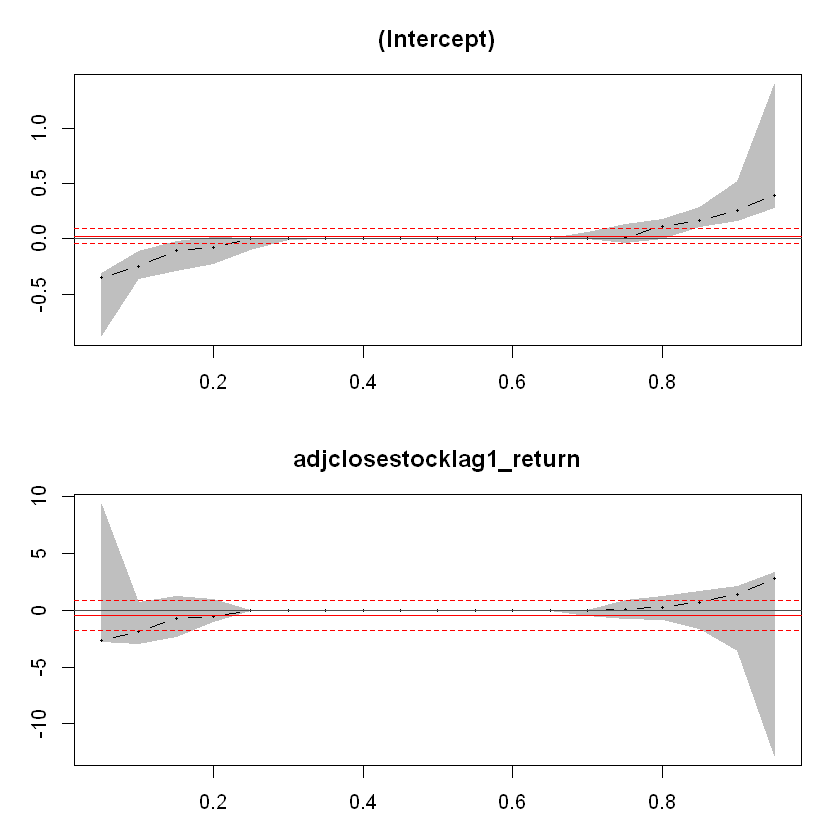

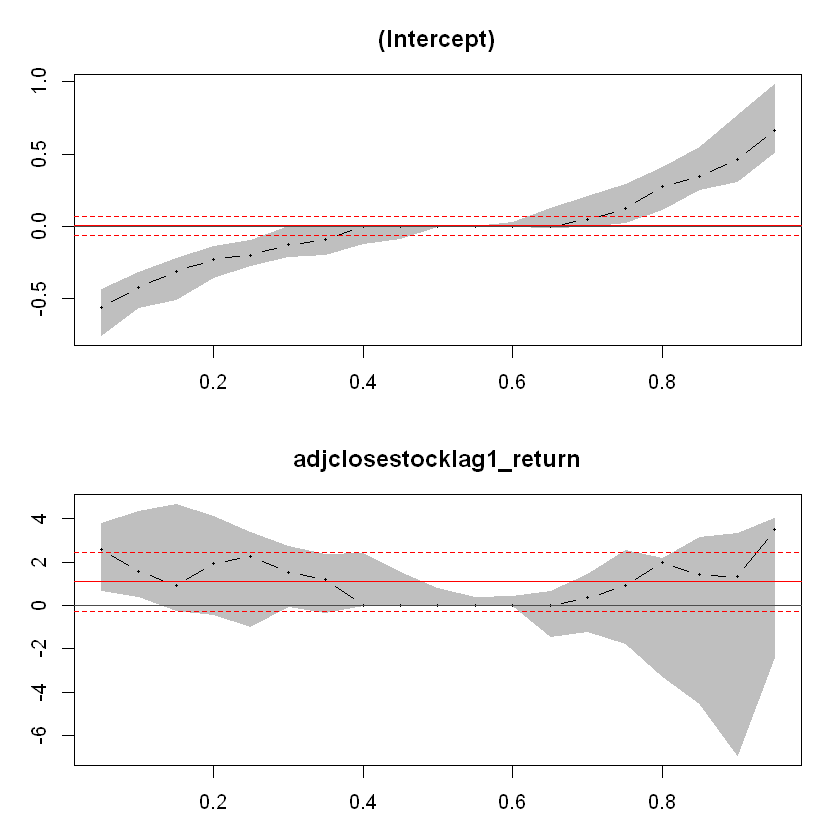

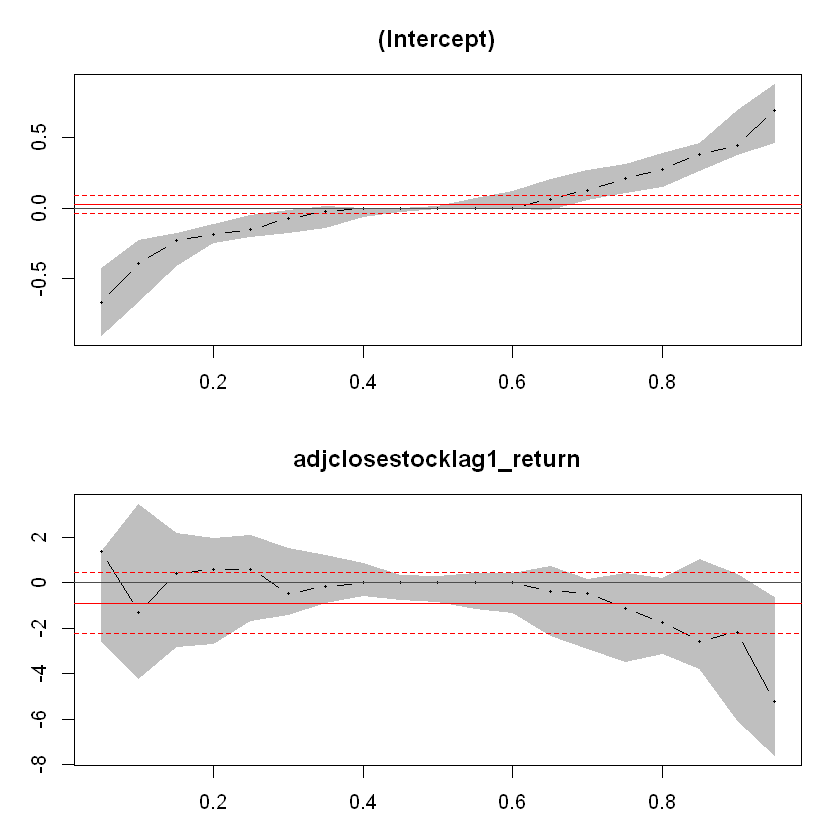

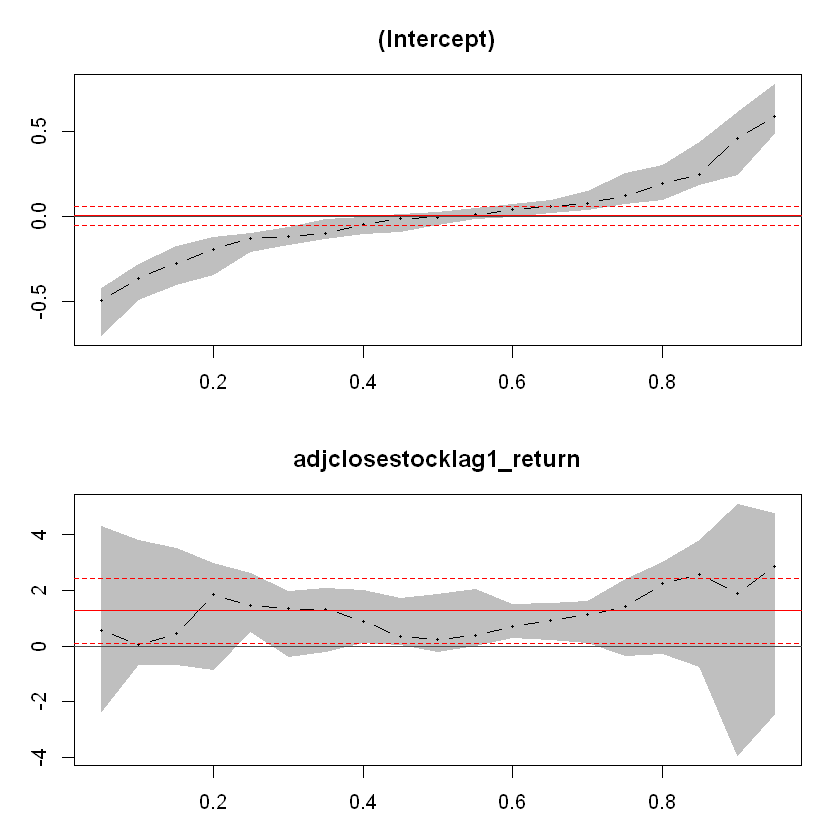

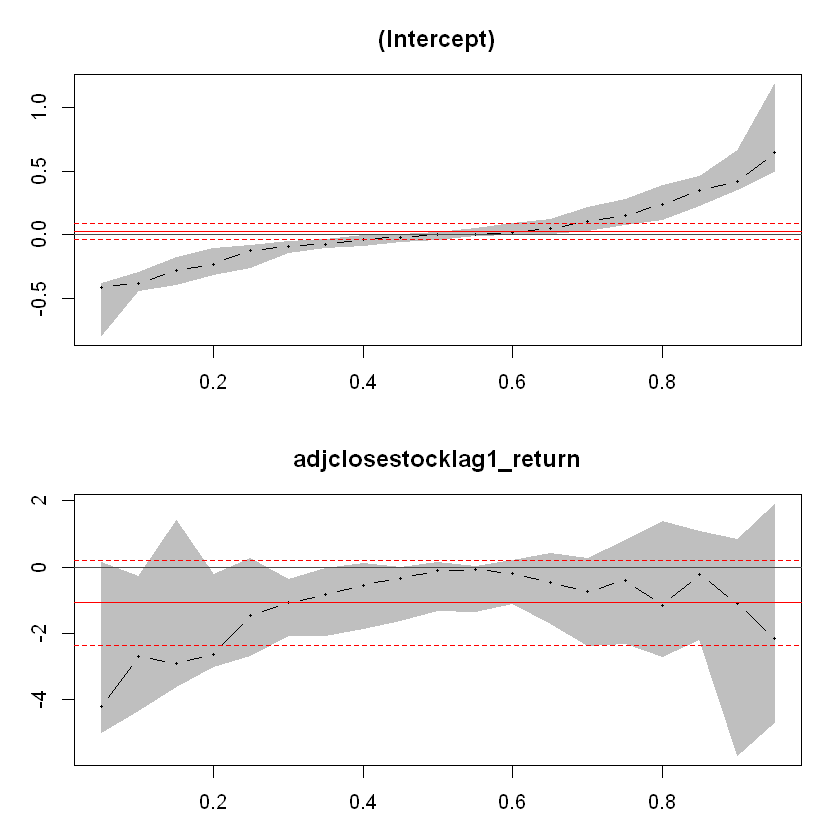

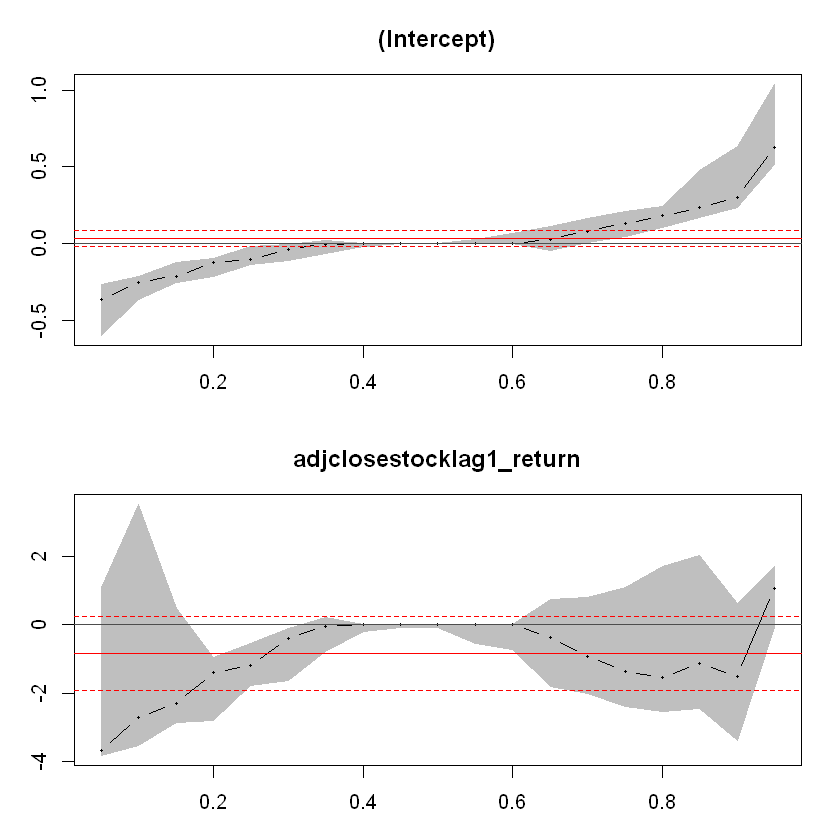

In [46]:

for(grade_return in grade_returns) {
  #print(paste("Summary of quantile regression model for:", grade_return))
  #print(summary(quantile_models[[grade_return]]))
  plot(summary(quantile_models[[grade_return]]))
}